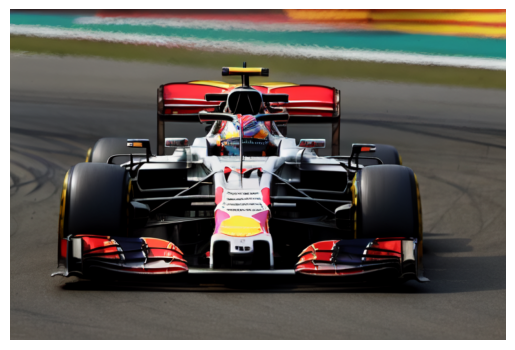

In [51]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Imagen original
image = cv2.imread("formula-1.png", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

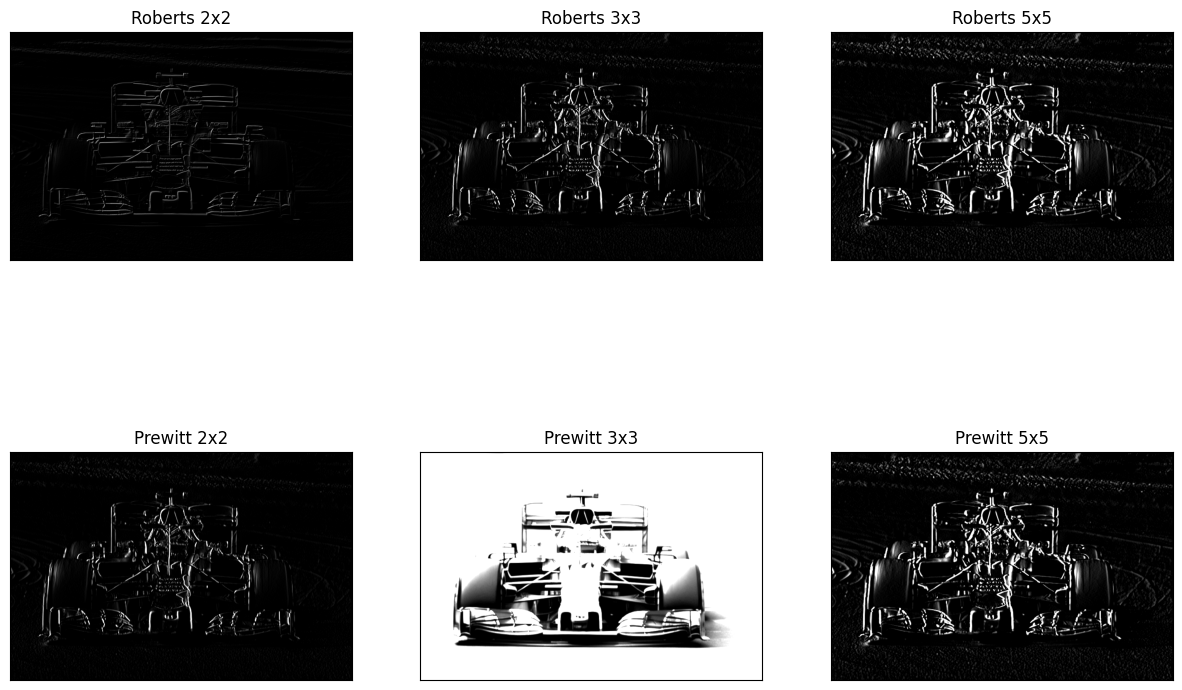

In [52]:
# Roberts and Prewitt

# Leer la imagen en escala de grises
image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

def apply_masks(image, masks, mask_names):
    results = []
    for mask, name in zip(masks, mask_names):
        result = cv2.filter2D(image, -1, mask)
        results.append((result, name))
    return results

# Definir las máscaras de Roberts y Prewitt de diferentes tamaños
roberts_masks = [
    np.array([[1, 0], [0, -1]]),
    np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    np.array([[1, 2, 0, -2, -1], [1, 2, 0, -2, -1], [1, 2, 0, -2, -1]])
]

prewitt_masks = [
    np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    np.array([[1, 1, 0], [1, 1, 0], [1, 1, 0]]),
    np.array([[1, 1, 0, -1, -1], [1, 1, 0, -1, -1], [2, 2, 0, -2, -2]])
]

mask_names = ['2x2', '3x3', '5x5']

# Aplicar las convoluciones
results_roberts = apply_masks(image, roberts_masks, mask_names)
results_prewitt = apply_masks(image, prewitt_masks, mask_names)

# Mostrar los resultados
plt.figure(figsize=(15, 10))

for i, (result, name) in enumerate(results_roberts + results_prewitt, 1):
    plt.subplot(2, 3, i), plt.imshow(result, cmap='gray')
    plt.title(f'Roberts {name}' if i <= 3 else f'Prewitt {name}')
    plt.xticks([]), plt.yticks([])

plt.show()

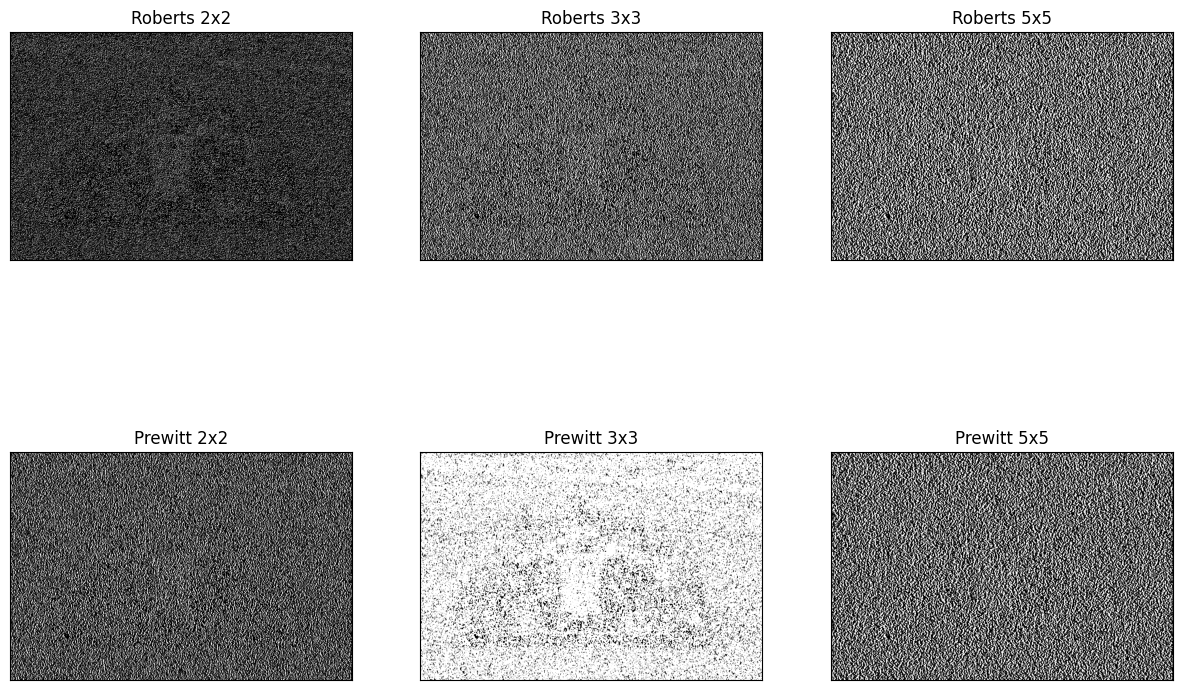

In [66]:
# Robets and Prewitts with salt and pepper noise

def apply_masks(image, masks, mask_names):
    results = []
    for mask, name in zip(masks, mask_names):
        result = cv2.filter2D(image, -1, mask)
        results.append((result, name))
    return results

# Leer la imagen en escala de grises
image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)


# Agregar ruido de sal y pimienta
noise = np.zeros_like(image)
cv2.randn(noise, 0, 255)
noise = cv2.normalize(noise, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
salt = (noise > 200)
pepper = (noise < 50)
image[salt] = 255
image[pepper] = 0

# Definir las máscaras de Roberts y Prewitt de diferentes tamaños
roberts_masks = [
    np.array([[1, 0], [0, -1]]),
    np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]]),
    np.array([[1, 2, 0, -2, -1], [1, 2, 0, -2, -1], [1, 2, 0, -2, -1]])
]

prewitt_masks = [
    np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]),
    np.array([[1, 1, 0], [1, 1, 0], [1, 1, 0]]),
    np.array([[1, 1, 0, -1, -1], [1, 1, 0, -1, -1], [2, 2, 0, -2, -2]])
]

mask_names = ['2x2', '3x3', '5x5']

# Aplicar las convoluciones
results_roberts = apply_masks(image, roberts_masks, mask_names)
results_prewitt = apply_masks(image, prewitt_masks, mask_names)

# Mostrar los resultados
plt.figure(figsize=(15, 10))

for i, (result, name) in enumerate(results_roberts + results_prewitt, 1):
    plt.subplot(2, 3, i), plt.imshow(result, cmap='gray')
    plt.title(f'Roberts {name}' if i <= 3 else f'Prewitt {name}')
    plt.xticks([]), plt.yticks([])

plt.show()


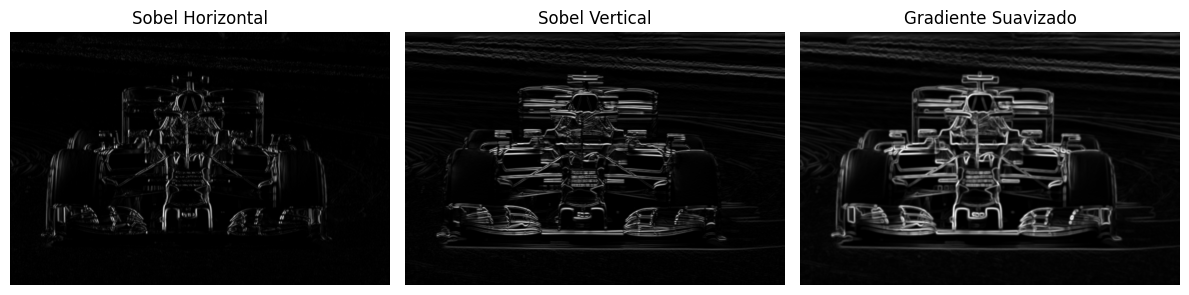

In [54]:

# Sobel operator

# Leer la imagen en escala de grises
image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar el operador Sobel
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Calcular el módulo del gradiente
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Aplicar suavizado
smoothed_image = cv2.GaussianBlur(gradient_magnitude, (5, 5), 0)

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('Sobel Horizontal'), plt.axis('off')

plt.subplot(132), plt.imshow(np.abs(sobely), cmap='gray')
plt.title('Sobel Vertical'), plt.axis('off')

plt.subplot(133), plt.imshow(smoothed_image, cmap='gray')
plt.title('Gradiente Suavizado'), plt.axis('off')

plt.tight_layout()
plt.show()

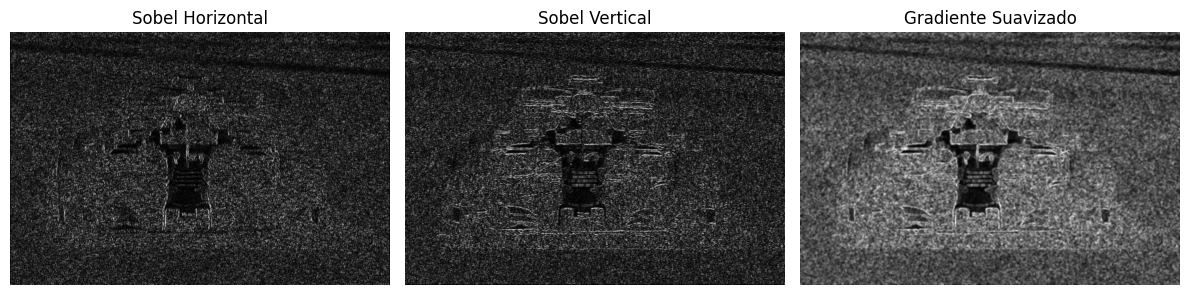

In [55]:
# Sobel operators with salt and pepper noise

image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

# Agregar ruido salt and pepper
noise = np.zeros(image.shape, np.uint8)
cv2.randn(noise, 0, 255)
noisy_image = cv2.add(image, noise)

# Aplicar el operador Sobel
sobelx = cv2.Sobel(noisy_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(noisy_image, cv2.CV_64F, 0, 1, ksize=5)

# Calcular el módulo del gradiente
gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

# Aplicar suavizado
smoothed_image = cv2.GaussianBlur(gradient_magnitude, (5, 5), 0)

# Mostrar los resultados
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(np.abs(sobelx), cmap='gray')
plt.title('Sobel Horizontal'), plt.axis('off')

plt.subplot(132), plt.imshow(np.abs(sobely), cmap='gray')
plt.title('Sobel Vertical'), plt.axis('off')

plt.subplot(133), plt.imshow(smoothed_image, cmap='gray')
plt.title('Gradiente Suavizado'), plt.axis('off')

plt.tight_layout()
plt.show()

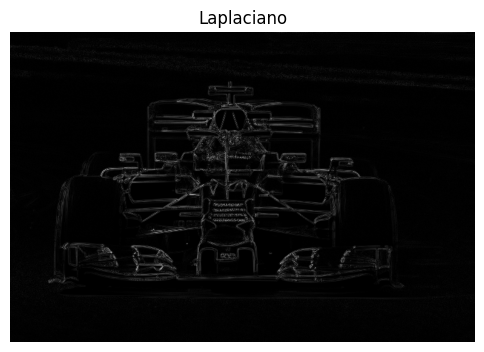

In [56]:
# Laplacian operator

image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar el operador Laplaciano
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Mostrar el resultado
plt.figure(figsize=(6, 6))
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplaciano'), plt.axis('off')
plt.show()

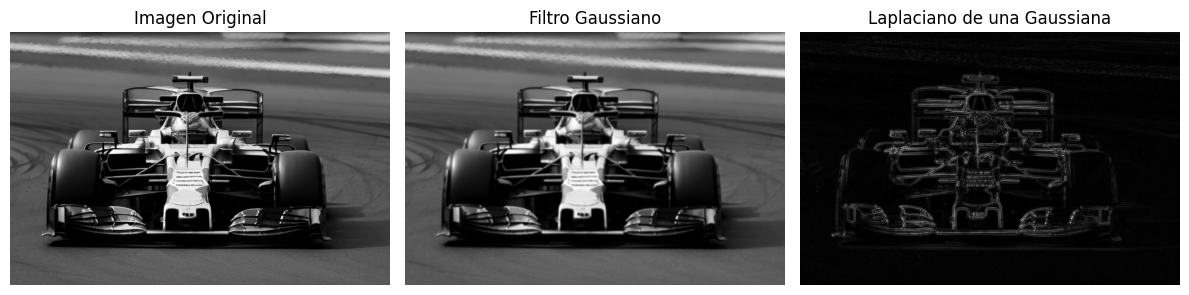

In [57]:
# Laplacian of Gaussian

image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar filtro Gaussiano
gaussian_blur = cv2.GaussianBlur(image, (5,5), 0)

# Aplicar el operador Laplaciano sobre la imagen suavizada
laplacian_of_gaussian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(gaussian_blur, cmap='gray')
plt.title('Filtro Gaussiano'), plt.axis('off')

plt.subplot(133), plt.imshow(np.abs(laplacian_of_gaussian), cmap='gray')
plt.title('Laplaciano de una Gaussiana'), plt.axis('off')

plt.tight_layout()
plt.show()

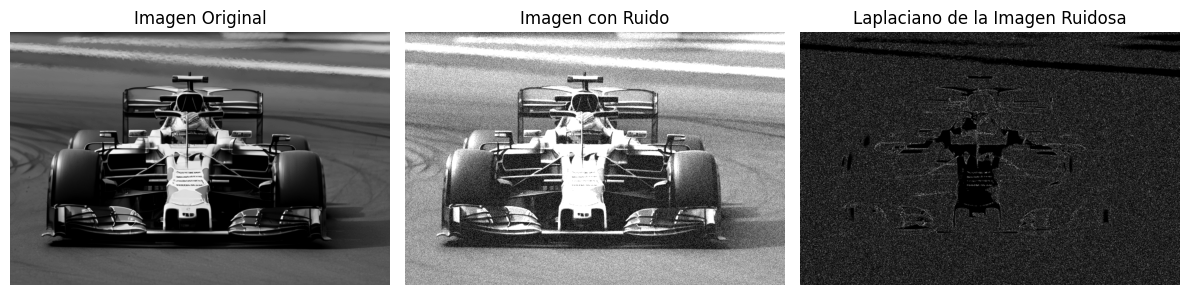

In [58]:
# Laplacian of Gaussian with salt and pepper noise


# Aplicar ruido salt and pepper
noise = np.random.randint(0, 50, image.shape, np.uint8)
noisy_image = cv2.add(image, noise*255-128)

# Aplicar el operador Laplaciano sobre la imagen con ruido
laplacian = cv2.Laplacian(noisy_image, cv2.CV_64F)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(noisy_image, cmap='gray')
plt.title('Imagen con Ruido'), plt.axis('off')

plt.subplot(133), plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplaciano de la Imagen Ruidosa'), plt.axis('off')

plt.tight_layout()
plt.show()

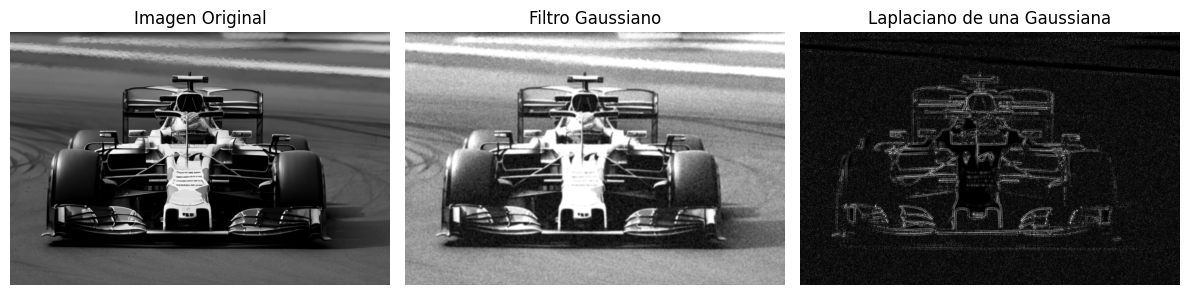

In [59]:

# Aplicar ruido salt and pepper
noise = np.random.randint(0, 50, image.shape, np.uint8)
noisy_image = cv2.add(image, noise*255-128)

# Aplicar filtro Gaussiano
gaussian_blur = cv2.GaussianBlur(noisy_image, (5,5), 0)

# Aplicar el operador Laplaciano sobre la imagen suavizada
laplacian_of_gaussian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(gaussian_blur, cmap='gray')
plt.title('Filtro Gaussiano'), plt.axis('off')

plt.subplot(133), plt.imshow(np.abs(laplacian_of_gaussian), cmap='gray')
plt.title('Laplaciano de una Gaussiana'), plt.axis('off')

plt.tight_layout()
plt.show()

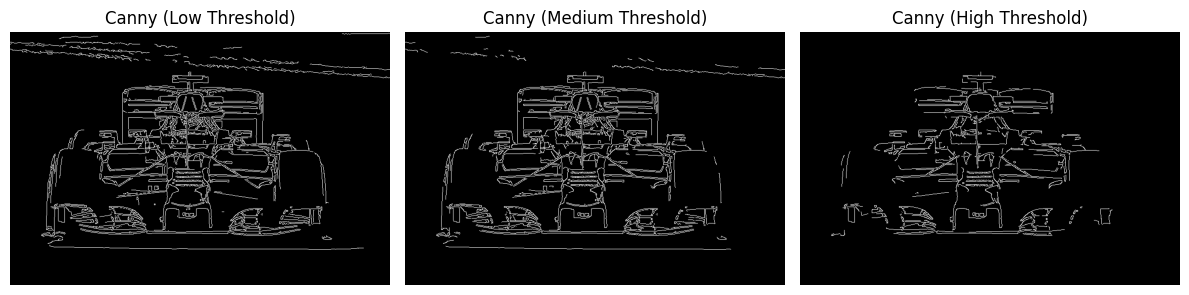

In [60]:
# Canny Operator

image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

# Aplicar el detector de bordes de Canny con diferentes valores de threshold
edges_low = cv2.Canny(image, 100, 200)
edges_medium = cv2.Canny(image, 150, 250)
edges_high = cv2.Canny(image, 300, 500)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(edges_low, cmap='gray')
plt.title('Canny (Low Threshold)'), plt.axis('off')

plt.subplot(132), plt.imshow(edges_medium, cmap='gray')
plt.title('Canny (Medium Threshold)'), plt.axis('off')

plt.subplot(133), plt.imshow(edges_high, cmap='gray')
plt.title('Canny (High Threshold)'), plt.axis('off')

plt.tight_layout()
plt.show()

(Text(0.5, 1.0, 'Detector de esquibas'), (-0.5, 767.5, 511.5, -0.5))

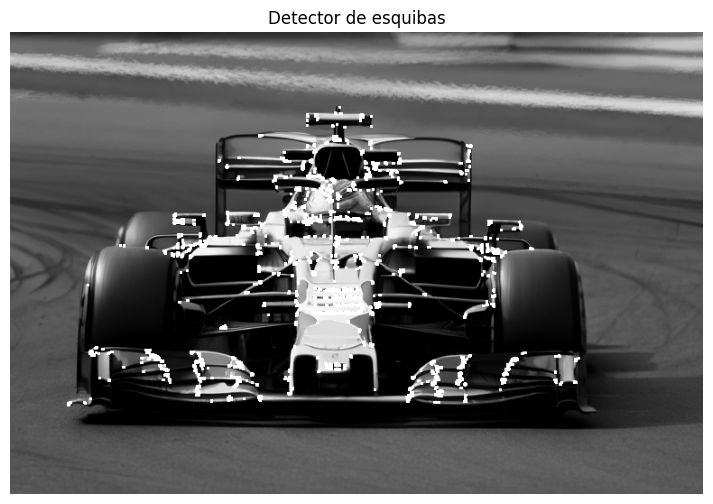

In [61]:
# Corner detection using Harris operator

import cv2
import numpy as np

# Leer la imagen en escala de grises
image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

# Convertir la imagen a tipo float32
image = np.float32(image)

# Aplicar el detector de esquinas de Harris
dst = cv2.cornerHarris(image, 2, 3, 0.04)

# Dilatar los resultados para una mejor visualización
dst = cv2.dilate(dst, None)

# Marcar las esquinas en la imagen original
image[dst > 0.01 * dst.max()] = 255

# Convertir la imagen de nuevo a tipo uint8
image = np.uint8(image)

# Mostrar las imágenes
plt.figure(figsize=(12, 6))

plt.imshow(image, cmap='gray')
plt.title('Detector de esquibas'), plt.axis('off')

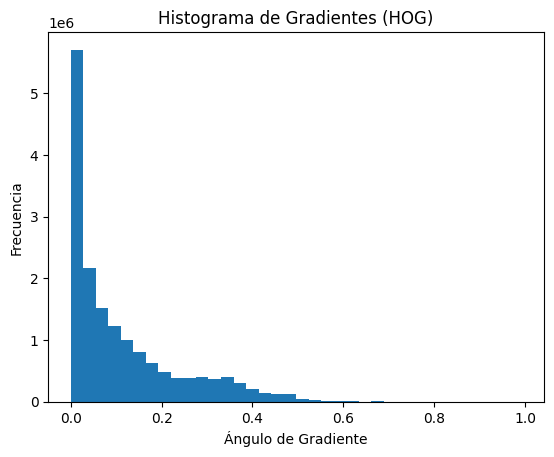

In [62]:
# HOG

# Leer la imagen en escala de grises
image = cv2.imread("formula-1.png", cv2.IMREAD_GRAYSCALE)

# Inicializar el detector HOG
hog = cv2.HOGDescriptor()

# Calcular el descriptor HOG
hog_descriptor = hog.compute(image)

# Graficar el histograma de gradientes
plt.hist(hog_descriptor, bins=36)
plt.xlabel('Ángulo de Gradiente')
plt.ylabel('Frecuencia')
plt.title('Histograma de Gradientes (HOG)')
plt.show()